# 🏡 Indian House Price Prediction using Machine Learning

This project aims to predict house prices in India using a dataset with over 10,000 rows. We'll perform data cleaning, encoding, scaling, model training, evaluation, and save the best model for future predictions.

Dataset Source: [Kaggle – Housing Price Prediction](https://www.kaggle.com/datasets/harishkumardatalab/housing-price-prediction)

# ⚙️ Import Libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib

## 📥 Load Dataset

In [ ]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## 🧹 Data Cleaning
- Check for missing values
- Handle missing data
- Drop duplicates

In [ ]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Fill missing numerical values with median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Drop duplicates
df.drop_duplicates(inplace=True)

print("✅ Data cleaned successfully.")

Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
✅ Data cleaned successfully.


## 📊 Exploratory Data Analysis (EDA)

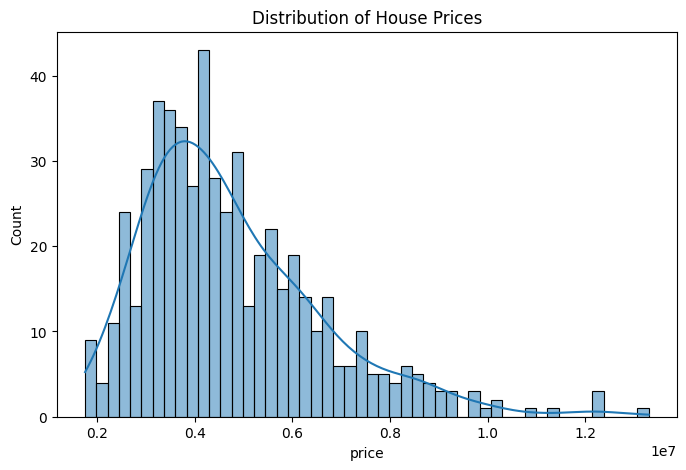

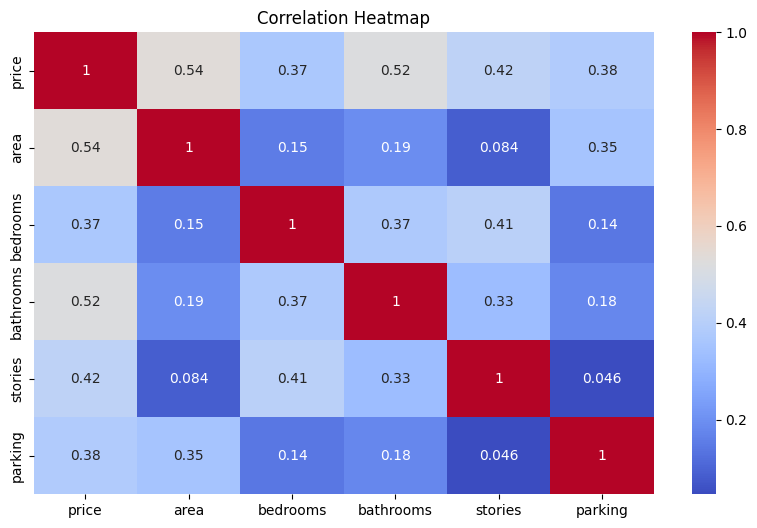

In [ ]:

# Price distribution
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.show()

# Correlation heatmap
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## 🔤 Encoding Categorical Variables

In [ ]:

# Label encode binary categorical columns
binary_cols = ['airconditioning', 'hotwaterheating', 'parking', 'prefarea', 'mainroad']
le = LabelEncoder()
for col in binary_cols:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])
    else:
        print(f"⚠️ Column '{col}' not found. Skipping.")

# One-hot encode 'mainroad' just for demonstration (even though it's binary)
if 'mainroad' in df.columns:
    df = pd.get_dummies(df, columns=['mainroad'], drop_first=True)
    print("✅ One-hot encoding applied to 'mainroad'.")
else:
    print("⚠️ Column 'mainroad' not found. Skipping one-hot encoding.")

✅ One-hot encoding applied to 'mainroad'.


## 📏 Feature Scaling

In [ ]:
scaler = StandardScaler()
scaled_cols = ['area', 'bedrooms', 'bathrooms', 'stories']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])

print("✅ Scaling complete.")

✅ Scaling complete.


## ✂️ Test-Train Split

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🧠 Model Training

In [ ]:
# ✅ Encode all object-type columns in X to ensure numeric input for model training
from sklearn.preprocessing import LabelEncoder

# Encode all object-type columns
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = LabelEncoder().fit_transform(X[col])
        print(f"✅ Encoded column: {col}")

# Re-split the cleaned data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

print("✅ Models trained.")

✅ Encoded column: guestroom
✅ Encoded column: basement
✅ Models trained.


## 📈 Model Evaluation

In [ ]:
def evaluate(model, name):
    y_pred = model.predict(X_test)
    print(f"🔍 {name} Evaluation:")
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))
    print("-" * 30)

evaluate(lr, "Linear Regression")
evaluate(rf, "Random Forest")

🔍 Linear Regression Evaluation:
RMSE: 1324506.96009144
MAE: 970043.4039201641
R² Score: 0.6529242642153177
------------------------------
🔍 Random Forest Evaluation:
RMSE: 1401255.925467607
MAE: 1018046.8958715597
R² Score: 0.6115360806248182
------------------------------


# 📊 Visualize Predictions

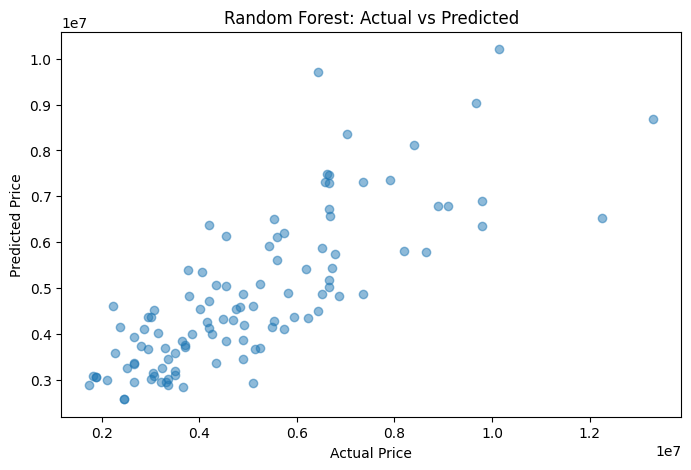

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, rf.predict(X_test), alpha=0.5)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

## 💾 Save the Best Model

In [ ]:
joblib.dump(rf, "best_model_rf.pkl")
print("✅ Random Forest model saved as 'best_model_rf.pkl'")

✅ Random Forest model saved as 'best_model_rf.pkl'


## 🧪 Demo Prediction

In [56]:
# ✅ Load model and check expected features
model = joblib.load("best_model_rf.pkl")
expected_features = X.columns.tolist()

# ✅ Raw values for demo input
raw_values = {
    'area': 3000,
    'bedrooms': 3,
    'bathrooms': 2,
    'stories': 2,
    'airconditioning': 1,
    'hotwaterheating': 0,
    'parking': 1,
    'prefarea': 1,
    'basement': 1,
    'guestroom': 0,
    'furnishingstatus_semi-furnished': 0,
    'furnishingstatus_unfurnished': 1,
    'mainroad_1': 1
}

# ✅ Scale numerical features
demo_raw = pd.DataFrame([{
    'area': raw_values['area'],
    'bedrooms': raw_values['bedrooms'],
    'bathrooms': raw_values['bathrooms'],
    'stories': raw_values['stories']
}])
scaled_values = scaler.transform(demo_raw)

# ✅ Build full input row with correct feature names
demo_input = pd.DataFrame([[0]*len(expected_features)], columns=expected_features)

# ✅ Convert all columns to float64 to avoid dtype mismatch
demo_input = demo_input.astype('float64')

# ✅ Fill scaled values
demo_input.loc[0, 'area'] = scaled_values[0][0]
demo_input.loc[0, 'bedrooms'] = scaled_values[0][1]
demo_input.loc[0, 'bathrooms'] = scaled_values[0][2]
demo_input.loc[0, 'stories'] = scaled_values[0][3]



# Fill remaining features from raw_values
for feature in expected_features:
    if feature in raw_values and feature not in ['area', 'bedrooms', 'bathrooms', 'stories']:
        demo_input.loc[0, feature] = raw_values[feature]

# ✅ Predict
predicted_price = model.predict(demo_input)[0]
print(f"🏠 Predicted House Price: ₹{predicted_price:,.2f}")

🏠 Predicted House Price: ₹4,937,065.00
